In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay

loans_df = pd.read_csv('loans_full_schema.csv')
loans_df = loans_df.dropna(axis=1)
loans_df.head()

,state,homeownership,annual_income,verified_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,NJ,MORTGAGE,90000.0,Verified,0,2001,6,28,10,70795,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,HI,RENT,40000.0,Not Verified,0,1996,1,30,14,28800,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,WI,RENT,40000.0,Source Verified,0,2006,4,31,10,24193,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,PA,RENT,30000.0,Not Verified,0,2007,0,4,4,25400,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,CA,RENT,35000.0,Verified,0,2008,7,22,16,69839,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [66]:
loans_encoded = pd.get_dummies(data=loans_df, columns=['state', 'homeownership', 'verified_income', 'loan_purpose', 'application_type', 'grade', 'sub_grade', 'issue_month', 'loan_status', 'initial_listing_status', 'disbursement_method'], dtype=int)
loans_df = pd.concat([loans_df, loans_encoded], axis=1).reindex(loans_df.index)
loans_df = loans_df.drop(['state', 'homeownership', 'verified_income', 'loan_purpose', 'application_type', 'grade', 'sub_grade', 'issue_month', 'loan_status', 'initial_listing_status', 'disbursement_method'], axis=1)
loans_df.head()

,annual_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,...,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),initial_listing_status_fractional,initial_listing_status_whole,disbursement_method_Cash,disbursement_method_DirectPay
0,90000.0,0,2001,6,28,10,70795,38767,0,0,...,0,1,0,0,0,0,0,1,1,0
1,40000.0,0,1996,1,30,14,28800,4321,0,1,...,0,1,0,0,0,0,0,1,1,0
2,40000.0,0,2006,4,31,10,24193,16000,0,0,...,0,1,0,0,0,0,1,0,1,0
3,30000.0,0,2007,0,4,4,25400,4997,0,1,...,0,1,0,0,0,0,0,1,1,0
4,35000.0,0,2008,7,22,16,69839,52722,0,0,...,0,1,0,0,0,0,0,1,1,0


In [77]:
x = loans_df.drop('loan_status_Fully Paid', axis=1)
y = loans_df['loan_status_Fully Paid']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                    random_state=42,
                                                    stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [81]:
regression = LogisticRegression(random_state=42, max_iter=10000).fit(x_train, y_train)
y_predicted = regression.predict(x_test)
y_predicted

array([0, 1, 0, ..., 0, 0, 0])

In [83]:
regression.score(x_test, y_test)

0.999

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0,
   np.float64(0.0),
   0.9507462686567165,
   np.float64(0.9956346453736106)),
  ('0', '1'): (0.0,
   np.float64(0.9989569045098232),
   0.9507462686567165,
   np.float64(0.001043095490176692)),
  ('1', '0'): (0.955721393034826,
   np.float64(0.0),
   0.04427860696517412,
   np.float64(0.0)),
  ('1', '1'): (0.955721393034826,
   np.float64(0.0033222591362126247),
   0.04427860696517412,
   np.float64(0.9966777408637874))})

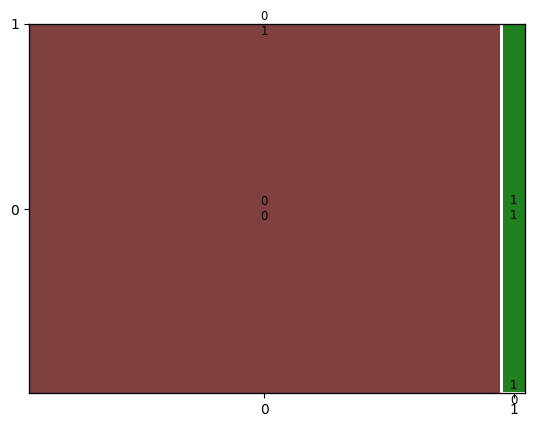

In [84]:
conf_matrix = confusion_matrix(y_test, y_predicted)
mosaic(conf_matrix)

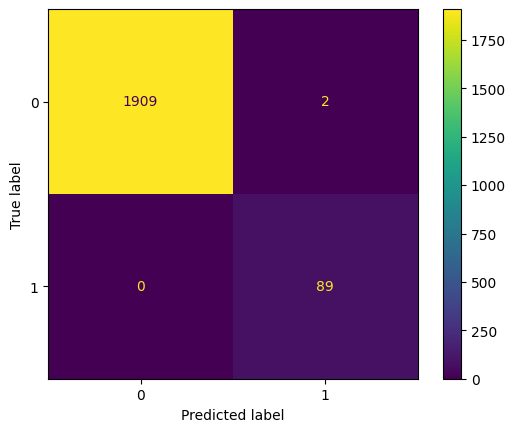

In [85]:
ConfusionMatrixDisplay.from_estimator(regression, x_test, y_test)

In [86]:
def precision_and_recall(calc_type:str, tp: int, tn: int,
                        fp: int, fn: int) -> float:
    if calc_type == "precision":
        value = tp / (tp + fp)
        return value
    elif calc_type == "recall":
        value = tp / (tp + fn) 
        return value
    else:
        error_msg = "something happened here. check your inputs"
        return error_msg

In [87]:
precision_and_recall('precision', 89, 1909, 2, 0)

0.978021978021978

In [88]:
precision_and_recall('recall', 89, 1909, 2, 0)

1.0

#### I chose logistic regression just because there are so many factors at play when it comes to someone repaying their loan, and logistic regression is better for categorical values.